In [13]:
import pandas as pd

# Data provided by the user
data_tuples = [(0.001, 0, 0, 0.2, 0.1837070561612837), (0.001, 0, 1, 0.72, 0.5437152849207982), (0.001, 0, 2, 0.48, 0.3120757045875334), (0.001, 1, 0, 0.32, 0.29664678049783993), (0.001, 1, 1, 0.56, 0.29541246657066444), (0.001, 1, 2, 0.72, 0.5334293355276692), (0.001, 2, 0, 0.28, 0.23760543098127956), (0.001, 2, 1, 0.4, 0.358773914832339), (0.001, 2, 2, 0.92, 0.6161283686484262), (0.001, 3, 0, 0.96, 0.7975725159432215), (0.001, 3, 1, 0.92, 0.7648631968730714), (0.001, 3, 2, 0.96, 0.713639168895289), (0.002, 0, 0, 0.68, 0.5116231228142357), (0.002, 0, 1, 0.54, 0.3639168895289035), (0.002, 0, 2, 0.52, 0.4402386340259206), (0.002, 1, 0, 0.44, 0.40012343139271755), (0.002, 1, 1, 0.76, 0.5681958444764452), (0.002, 1, 2, 0.56, 0.45690187204278954), (0.002, 2, 0, 0.72, 0.628471507920181), (0.002, 2, 1, 0.96, 0.7953096070767331), (0.002, 2, 2, 0.54, 0.45793046698210244), (0.002, 3, 0, 0.84, 0.8006583007611603), (0.002, 3, 1, 0.96, 0.8218473565110059), (0.002, 3, 2, 0.92, 0.8220530754988685), (0.005, 0, 0, 0.34615384615384615, 0.2978810944250154), (0.005, 0, 1, 0.5538461538461539, 0.4945484468216416), (0.005, 0, 2, 0.5769230769230769, 0.4877597202221765), (0.005, 1, 0, 0.4230769230769231, 0.38675169718164987), (0.005, 1, 1, 0.5923076923076923, 0.5669615305492697), (0.005, 1, 2, 0.18461538461538463, 0.20139888911746553), (0.005, 2, 0, 0.2230769230769231, 0.23102242336967702), (0.005, 2, 1, 0.2230769230769231, 0.23102242336967702), (0.005, 2, 2, 0.8615384615384616, 0.7782349310841391), (0.005, 3, 0, 0.8615384615384616, 0.8296646780497839), (0.005, 3, 1, 0.8846153846153846, 0.8699855996708497), (0.005, 3, 2, 0.8846153846153846, 0.8132071590207777), (0.01, 0, 0, 0.5153846153846153, 0.4309812795721045), (0.01, 0, 1, 0.5192307692307693, 0.4926969759308784), (0.01, 0, 2, 0.8153846153846154, 0.794898169101008), (0.01, 1, 0, 0.6923076923076923, 0.6751697181649866), (0.01, 1, 1, 0.3269230769230769, 0.3398477679489817), (0.01, 1, 2, 0.2076923076923077, 0.21291915243777002), (0.01, 2, 0, 0.7730769230769231, 0.7881094425015429), (0.01, 2, 1, 0.6115384615384616, 0.6087224850853734), (0.01, 2, 2, 0.7576923076923077, 0.7498457107591031), (0.01, 3, 0, 0.8461538461538461, 0.8407735033943633), (0.01, 3, 1, 0.8846153846153846, 0.8646369059864225), (0.01, 3, 2, 0.9230769230769231, 0.8566138654597819), (0.05, 0, 0, 0.3522727272727273, 0.3493108413906604), (0.05, 0, 1, 0.6704545454545454, 0.6513063155729274), (0.05, 0, 2, 0.23863636363636365, 0.25015428924089694), (0.05, 1, 0, 0.47045454545454546, 0.4702736062538572), (0.05, 1, 1, 0.271969696969697, 0.2637317424398272), (0.05, 1, 2, 0.4984848484848485, 0.4933141328944662), (0.05, 2, 0, 0.8575757575757575, 0.8611396831927587), (0.05, 2, 1, 0.3090909090909091, 0.2970582184735651), (0.05, 2, 2, 0.7893939393939394, 0.7907837893437565), (0.05, 3, 0, 0.8704545454545455, 0.8564081464719193), (0.05, 3, 1, 0.8393939393939394, 0.8664883768771857), (0.05, 3, 2, 0.8484848484848485, 0.8648426249742851), (0.1, 0, 0, 0.8540642722117202, 0.8510594527874923), (0.1, 0, 1, 0.8820415879017013, 0.8827401769183295), (0.1, 0, 2, 0.8253308128544423, 0.8232873894260441), (0.1, 1, 0, 0.2918714555765595, 0.27813207159020775), (0.1, 1, 1, 0.8351606805293006, 0.8442707261880271), (0.1, 1, 2, 0.8173913043478261, 0.8175272577658917), (0.1, 2, 0, 0.8786389413988658, 0.8874717136391689), (0.1, 2, 1, 0.8805293005671078, 0.8944661592264966), (0.1, 2, 2, 0.8986767485822307, 0.9047521086196256), (0.1, 3, 0, 0.9137996219281663, 0.9142151820613043), (0.1, 3, 1, 0.8930056710775047, 0.9022834807652746), (0.1, 3, 2, 0.8994328922495274, 0.9210039086607694), (0.3, 0, 0, 0.9027095148078135, 0.9018720427895495), (0.3, 0, 1, 0.9136735979836169, 0.9117465542069533), (0.3, 0, 2, 0.9212350346565847, 0.9207981896729068), (0.3, 1, 0, 0.9120352867044739, 0.908455050401152), (0.3, 1, 1, 0.8862003780718336, 0.8897346225056573), (0.3, 1, 2, 0.9154379332073094, 0.9168895289035178), (0.3, 2, 0, 0.9163201008191556, 0.9205924706850442), (0.3, 2, 1, 0.9246376811594202, 0.9279983542480971), (0.3, 2, 2, 0.9285444234404537, 0.9242954124665707), (0.3, 3, 0, 0.9407687460617518, 0.9395186175684016), (0.3, 3, 1, 0.941650913673598, 0.9384900226290886), (0.3, 3, 2, 0.9407687460617518, 0.9395186175684016), (0.5, 0, 0, 0.9345427059712774, 0.9319070150174861), (0.5, 0, 1, 0.9377928949357521, 0.9356099567990126), (0.5, 0, 2, 0.925774754346183, 0.9249125694301584), (0.5, 1, 0, 0.9377928949357521, 0.9349927998354248), (0.5, 1, 1, 0.9238851095993953, 0.9181238428306933), (0.5, 1, 2, 0.9305366591080877, 0.9323184529932113), (0.5, 2, 0, 0.9463340891912321, 0.945690187204279), (0.5, 2, 1, 0.9406651549508692, 0.94178152643489), (0.5, 2, 2, 0.9523053665910809, 0.949598847973668), (0.5, 3, 0, 0.9586545729402872, 0.957416169512446), (0.5, 3, 1, 0.9549508692365836, 0.9530960707673318), (0.5, 3, 2, 0.9549508692365836, 0.952478913803744), (0.8, 0, 0, 0.9473311289560699, 0.9438387163135158), (0.8, 0, 1, 0.9610297590930562, 0.9553589796338202), (0.8, 0, 2, 0.9439300897496458, 0.9395186175684016), (0.8, 1, 0, 0.9514407179971658, 0.9452787492285538), (0.8, 1, 1, 0.9464808691544638, 0.9426044023863402), (0.8, 1, 2, 0.9578176665092112, 0.9563875745731331), (0.8, 2, 0, 0.9600377893245158, 0.955976136597408), (0.8, 2, 1, 0.9641001417099669, 0.961324830281835), (0.8, 2, 2, 0.9593292394898442, 0.9594733593910718), (0.8, 3, 0, 0.9624468587623997, 0.9615305492696976), (0.8, 3, 1, 0.9644780349551252, 0.9646163340876363), (0.8, 3, 2, 0.9627775153519131, 0.9639991771240486), (1, 0, 0, 0.9579076734004148, 0.9563875745731331), (1, 0, 1, 0.9657807819340963, 0.9611191112939724), (1, 0, 2, 0.952684537982948, 0.951038880888706), (1, 1, 0, 0.9468469160457792, 0.9430158403620654), (1, 1, 1, 0.9567171057684922, 0.954947541658095), (1, 1, 2, 0.9533758353176127, 0.9489816910100802), (1, 2, 0, 0.9609801059989247, 0.9615305492696976), (1, 2, 1, 0.9661264306014287, 0.9639991771240486), (1, 2, 2, 0.966049619786466, 0.9681135568813002), (1, 3, 0, 0.9680467009754974, 0.9685249948570253), (1, 3, 1, 0.9674706198632768, 0.9683192758691628), (1, 3, 2, 0.9653583224518012, 0.9646163340876363), (0.001, -1, 0, 0.96, 0.7726805184118494), (0.001, -1, 1, 0.32, 0.24213124871425631), (0.001, -1, 2, 0.84, 0.6667352396626208), (0.002, -1, 0, 0.36, 0.3538366591236371), (0.002, -1, 1, 0.4, 0.3419049578276075), (0.002, -1, 2, 0.22, 0.21230199547418227), (0.005, -1, 0, 0.27692307692307694, 0.26434889940341494), (0.005, -1, 1, 0.2, 0.1835013371734211), (0.005, -1, 2, 0.8076923076923077, 0.7628060069944456), (0.01, -1, 0, 0.823076923076923, 0.8204073235959679), (0.01, -1, 1, 0.40384615384615385, 0.36350545155317837), (0.01, -1, 2, 0.8730769230769231, 0.8329561818555853), (0.05, -1, 0, 0.5992424242424242, 0.6060481382431598), (0.05, -1, 1, 0.8401515151515152, 0.8249331413289447), (0.05, -1, 2, 0.6166666666666667, 0.6033737914009463), (0.1, -1, 0, 0.8173913043478261, 0.8327504628677227), (0.1, -1, 1, 0.2, 0.20037029417815264), (0.1, -1, 2, 0.7689981096408317, 0.783172186792841), (0.3, -1, 0, 0.8964083175803402, 0.8944661592264966), (0.3, -1, 1, 0.9197227473219912, 0.9193581567578688), (0.3, -1, 2, 0.9100189035916825, 0.9113351162312281), (0.5, -1, 0, 0.944671201814059, 0.9442501542892409), (0.5, -1, 1, 0.9610733182161754, 0.9580333264760338), (0.5, -1, 2, 0.9430839002267574, 0.9395186175684016), (0.8, -1, 0, 0.963863958431743, 0.9625591442090105), (0.8, -1, 1, 0.9565895134624468, 0.957416169512446), (0.8, -1, 2, 0.958053849787435, 0.9541246657066447), (1, -1, 0, 0.9678162685306091, 0.9635877391483234), (1, -1, 1, 0.9671633766034258, 0.9664678049783995), (1, -1, 2, 0.9515323757585068, 0.9481588150586299)]
# Define column names
columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# Create DataFrame
df = pd.DataFrame(data_tuples, columns=columns)

# Calculate mean and standard deviation for test accuracies
# Assuming that the provided data has a pattern where every three tuples belong to the same
# percentage and cut point but different trials
df['Mean Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('mean')
df['Median Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('median')
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')
df['Max Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('max')

# Now we display the DataFrame, though for brevity I'm only showing the first few rows here.
df.head()


,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy,Mean Train Accuracy,Median Train Accuracy,Mean Test Accuracy,Median Test Accuracy,Max Test Accuracy,Max Train Accuracy
0,0.001,0,0,0.20,0.183707,0.466667,0.48,0.346499,0.312076,0.543715,0.72
1,0.001,0,1,0.72,0.543715,0.466667,0.48,0.346499,0.312076,0.543715,0.72
2,0.001,0,2,0.48,0.312076,0.466667,0.48,0.346499,0.312076,0.543715,0.72
3,0.001,1,0,0.32,0.296647,0.533333,0.56,0.375163,0.296647,0.533429,0.72
4,0.001,1,1,0.56,0.295412,0.533333,0.56,0.375163,0.296647,0.533429,0.72


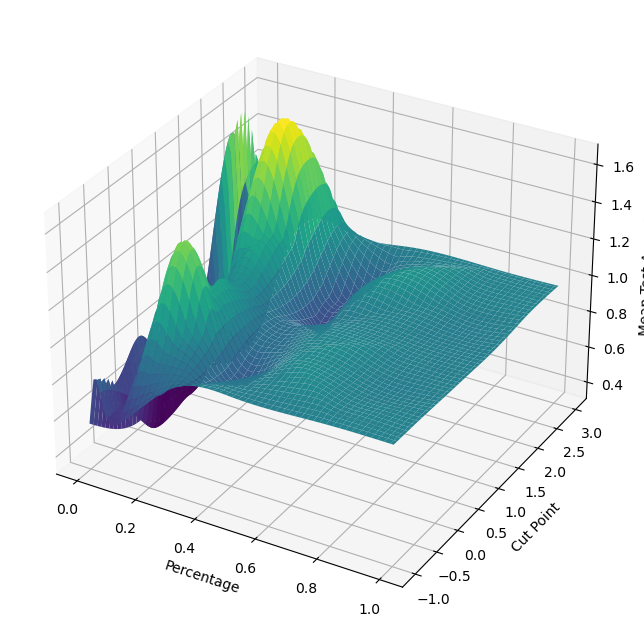

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create grid values
xi = np.linspace(df['Percentage'].min(), df['Percentage'].max(), 100)
yi = np.linspace(df['Cut Point'].min(), df['Cut Point'].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((df['Percentage'], df['Cut Point']), df['Mean Test Accuracy'], (xi, yi), method='cubic')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis')
ax.set_xlabel('Percentage')
ax.set_ylabel('Cut Point')
ax.set_zlabel('Mean Test Accuracy')
plt.show()

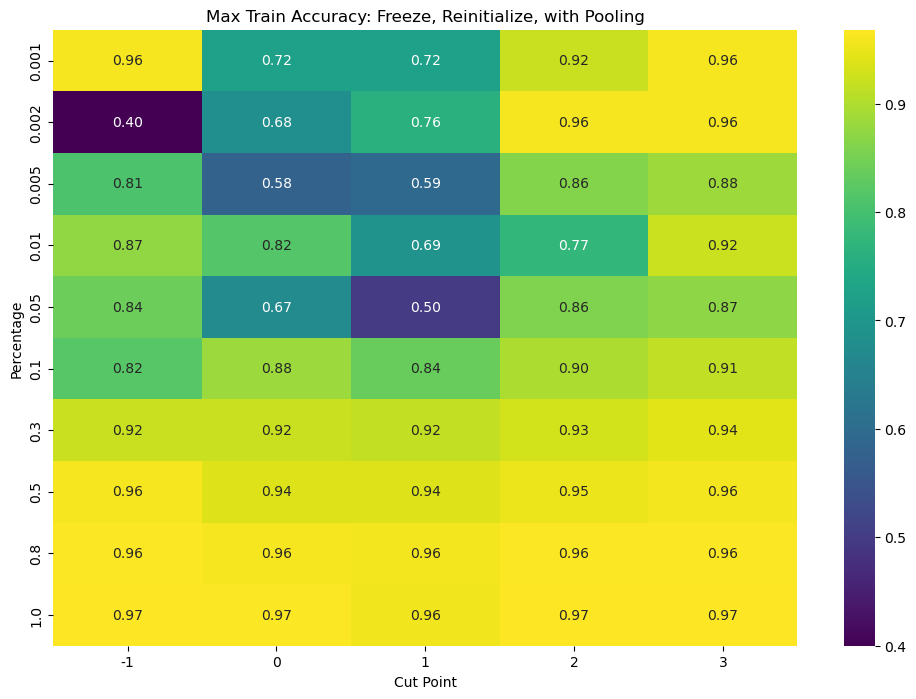

In [14]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Max Train Accuracy', aggfunc='median')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Max Train Accuracy: Freeze, Reinitialize, with Pooling')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


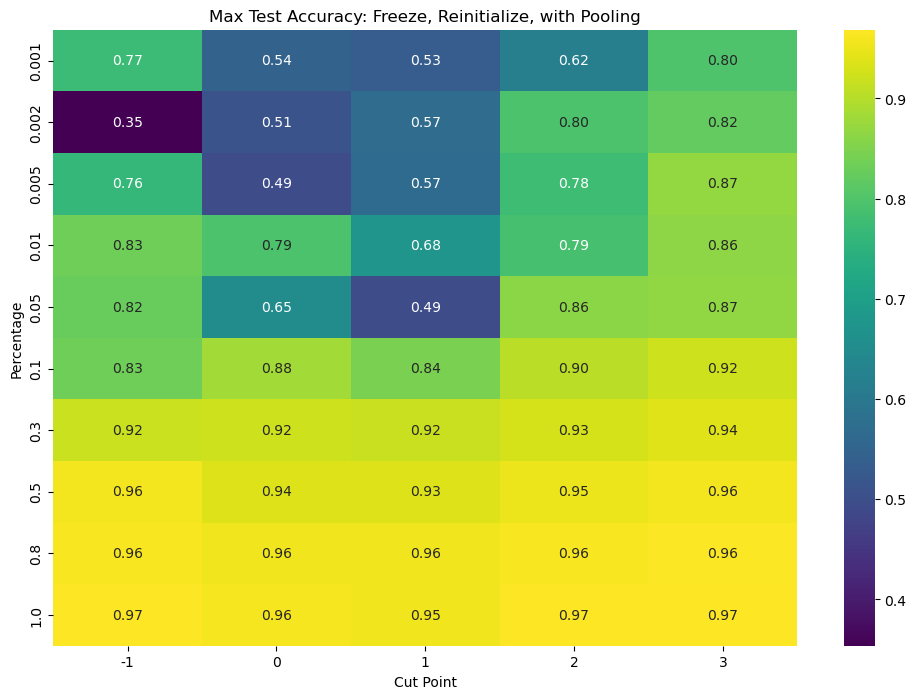

In [15]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Max Test Accuracy', aggfunc='mean')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Max Test Accuracy: Freeze, Reinitialize, with Pooling')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


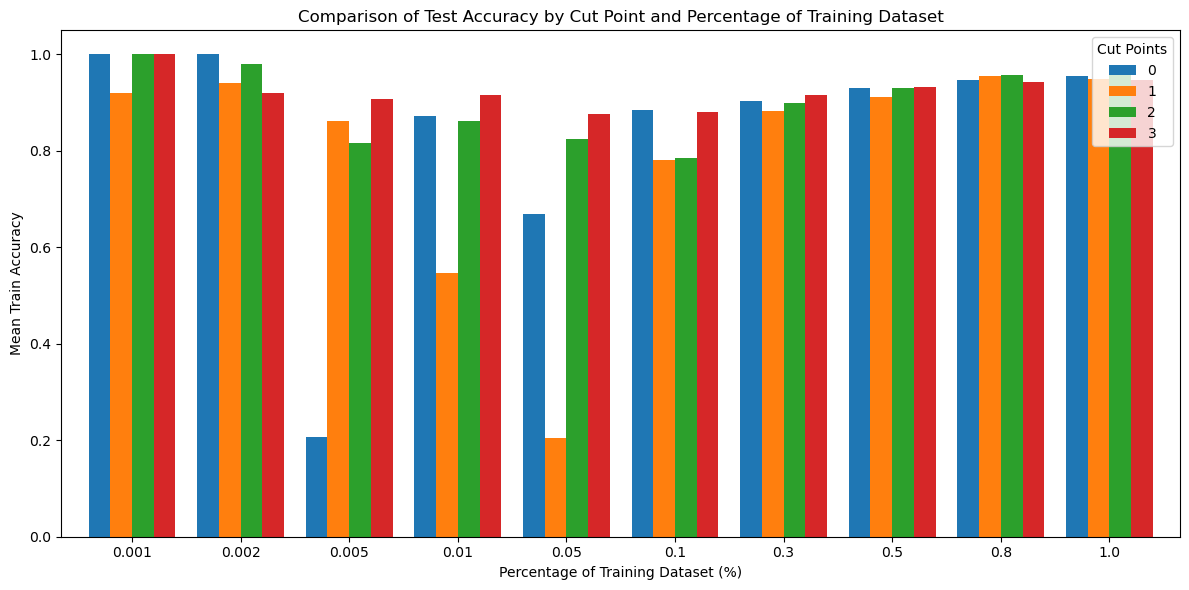

In [5]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Mean Train Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Mean Train Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


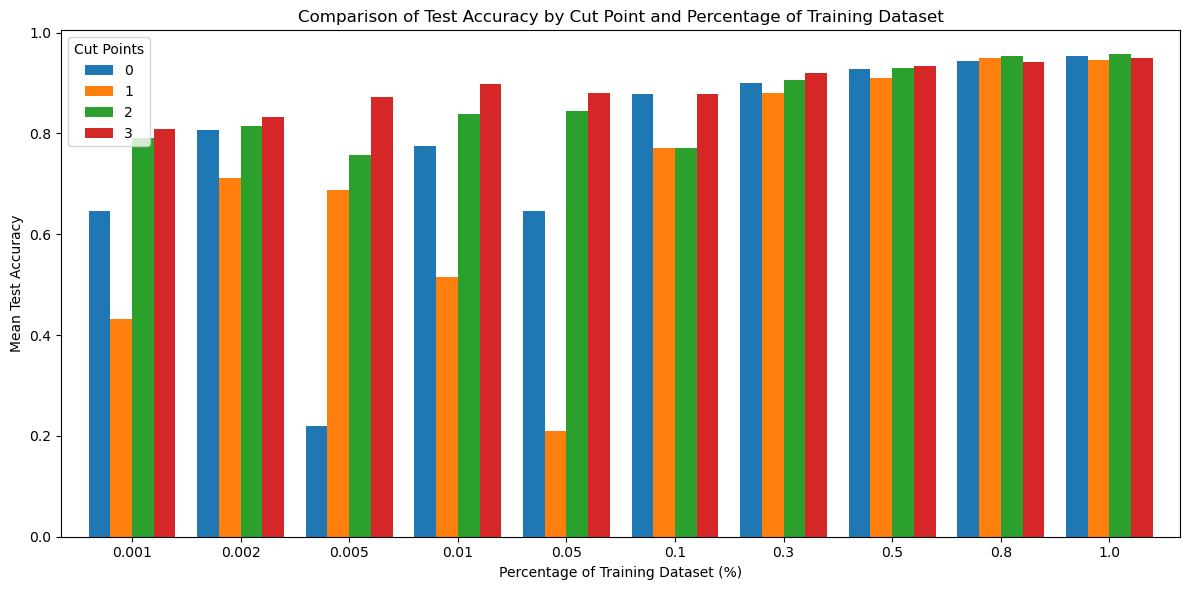

In [6]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Mean Test Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Mean Test Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


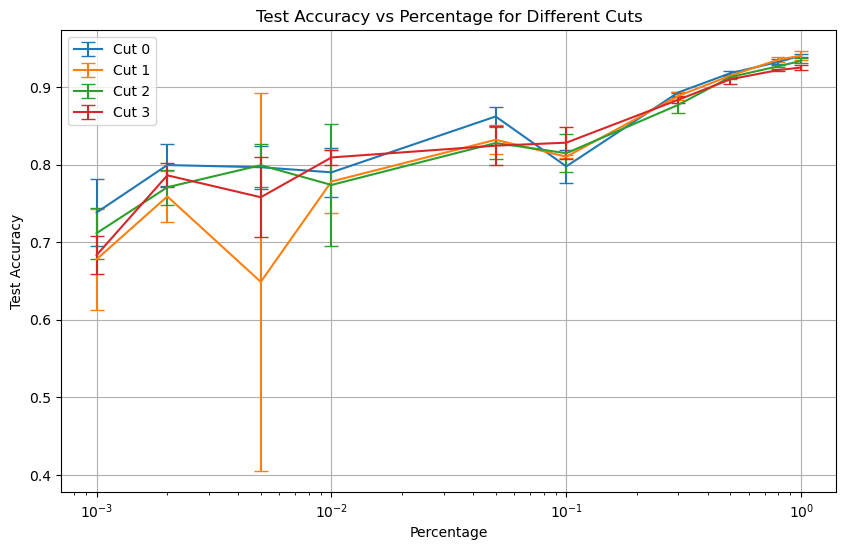

In [75]:
# Calculate mean and standard deviation for test accuracies
# Assuming that the provided data has a pattern where every three tuples belong to the same
# percentage and cut point but different trials
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate mean and standard deviation for each percentage
    means = cut_df.groupby('Percentage')['Mean Test Accuracy'].mean()
    stds = cut_df.groupby('Percentage')['Std Test Accuracy'].mean()

    # Plot with error bars for uncertainty
    plt.errorbar(means.index, means, yerr=stds, capsize=5, label=f'Cut {cut_point}')
    #plt.errorbar(means.index, means, capsize=5, label=f'Cut {cut_point}')


plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts')
plt.legend()
#x log
plt.xscale('log')
plt.grid(True)
plt.show()

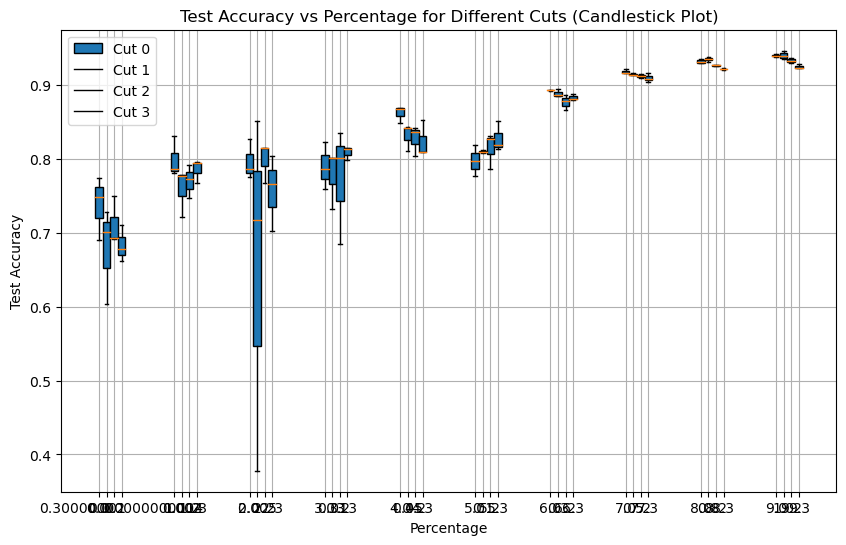

In [76]:

import numpy as np


# Define column names
columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# Create DataFrame
df = pd.DataFrame(data_tuples, columns=columns)

# Calculate mean and standard deviation for test accuracies
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Unique percentages and cut points
percentages = df['Percentage'].unique()
cut_points = df['Cut Point'].unique()

# Plotting
plt.figure(figsize=(10, 6))


# Iterate over each unique cut point
for cut_point in cut_points:
    cut_df = df[df['Cut Point'] == cut_point]

    # Create a list of arrays, each containing test accuracies for a given percentage
    data = [cut_df[cut_df['Percentage'] == p]['Test Accuracy'].values for p in percentages]

    # Position for the candle plots for this cut point
    positions = np.array(range(len(percentages))) + cut_point * 0.1  # slight offset for each cut point

    # Create boxplot (candlestick plot)
    plt.boxplot(data, positions=positions, widths=0.1, patch_artist=True, labels=percentages if cut_point == 1 else None)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts (Candlestick Plot)')
plt.legend([f'Cut {cp}' for cp in cut_points])
plt.grid(True)
plt.show()


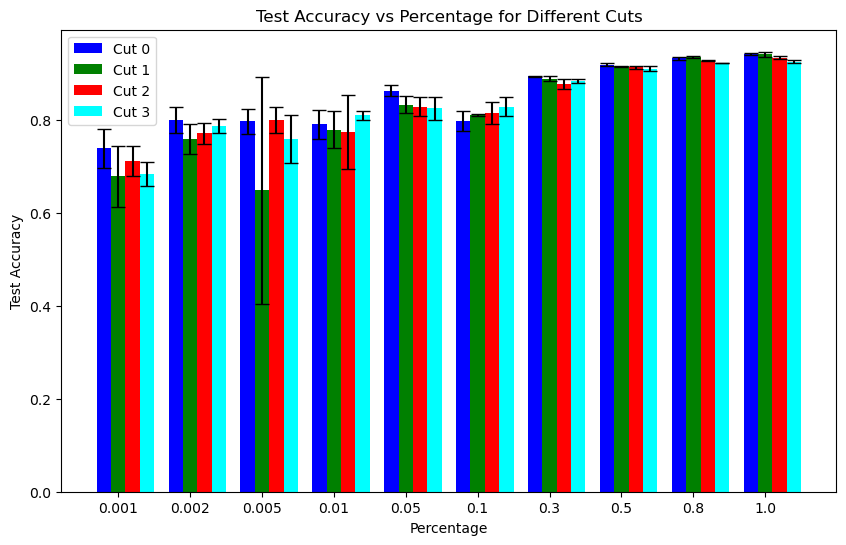

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Group by 'Percentage' and 'Cut Point' and calculate mean and std of 'Test Accuracy'
grouped = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].agg(['mean', 'std']).reset_index()

# Set figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each 'Cut Point'
colors = ['blue', 'green', 'red', 'cyan']

# Set positions of the bars
positions = np.arange(len(grouped['Percentage'].unique()))

# Width of each bar
bar_width = 0.2

# Loop through each 'Cut Point'
for i, cut in enumerate(grouped['Cut Point'].unique()):
    # Filter the data for the current 'Cut Point'
    cut_data = grouped[grouped['Cut Point'] == cut]
    
    # Calculate positions for the current 'Cut Point'
    cut_positions = positions + (i * bar_width)
    
    # Plot bars
    ax.bar(cut_positions, cut_data['mean'], width=bar_width, color=colors[i], yerr=cut_data['std'], capsize=5, label=f'Cut {cut}')

# Set x-ticks positions and labels
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(grouped['Percentage'].unique())

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy vs Percentage for Different Cuts')

# Display legend
ax.legend()

# Show plot
plt.show()


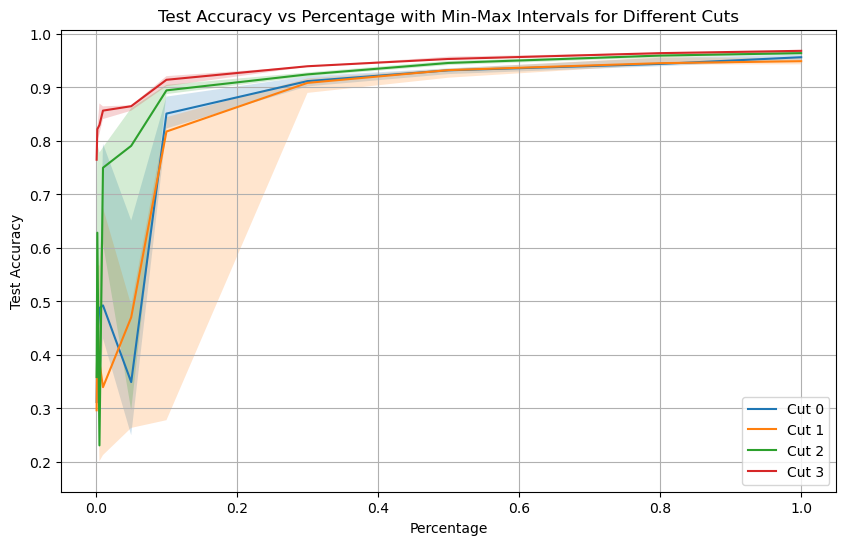

In [26]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
plt.show()


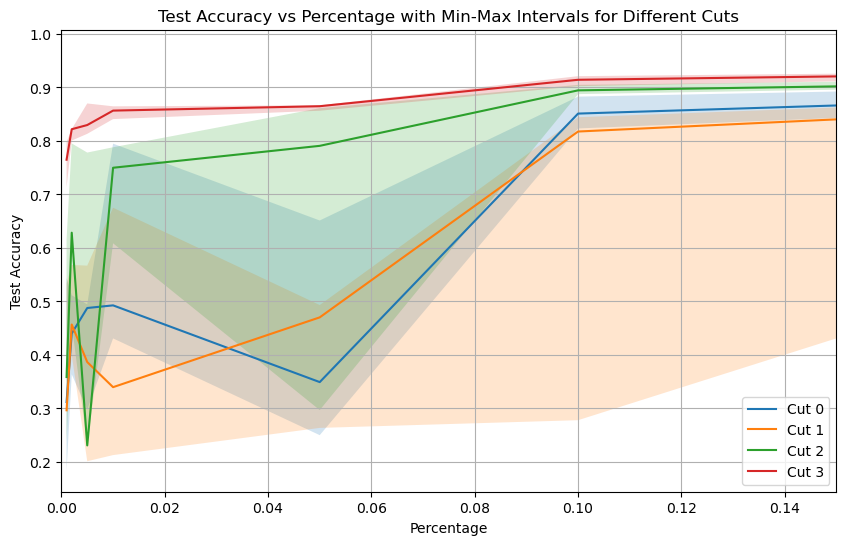

In [27]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
#plt.xscale('log')
#x limit to 0.3
plt.xlim(0, 0.15)
plt.show()


In [62]:
conv_indices = [0, 2, 4]
idx = 2
for idx in conv_indices[:idx]:
    print(idx)

print('##################')

for idx in conv_indices[idx:]:
    print(idx)

0
2
##################
4
